## House Price Prediction Model

For this project, we will be using the [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) dataset from Kaggle.

The main goal is to predict the **median_house_value** using the available features, after processing them into usable inputs.

We will try two models to predict the price, and pick the most accurate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## first loading the data
data = pd.read_csv('data/housing.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
## we then check to see if we have any nulls in the dataset
## and we see that total_bedrooms column has some nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
## a simple check to see if the number of bedrooms
## has a strong correlation with price
## which seems not to be the case
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [4]:
## since there aren't that many rows with missing values
## the best way to handle this is to drop the nan values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

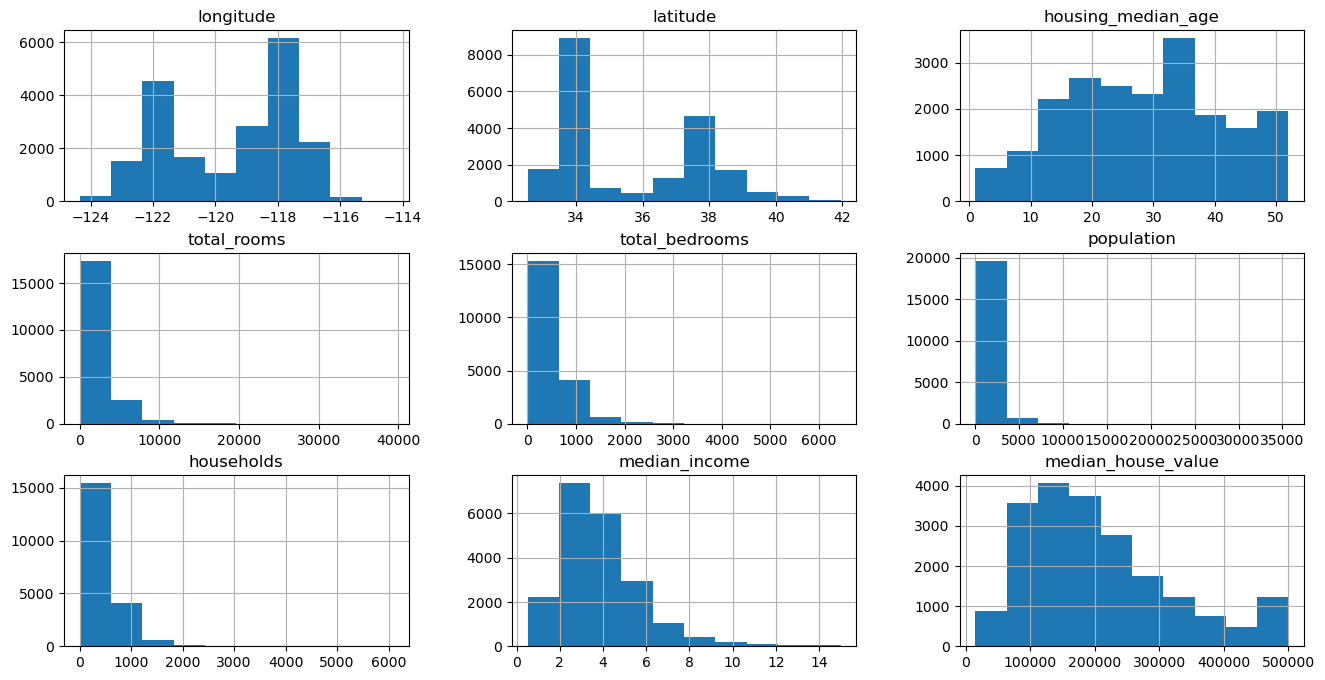

In [5]:
## now we want to check some distributions for each column
## to spot any skewness in our features
data.hist(figsize = (16, 8))

<AxesSubplot:>

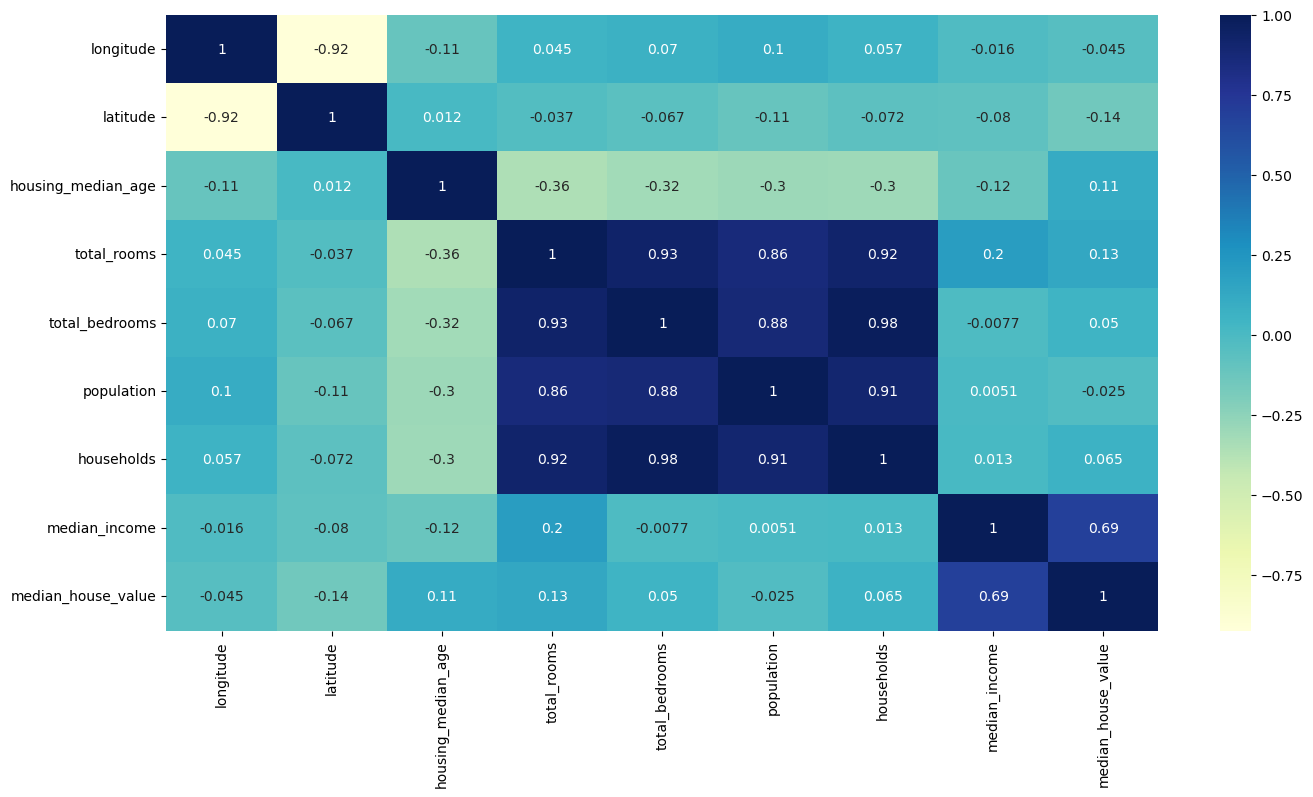

In [6]:
## the seaborn heatmap could be also useful here
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

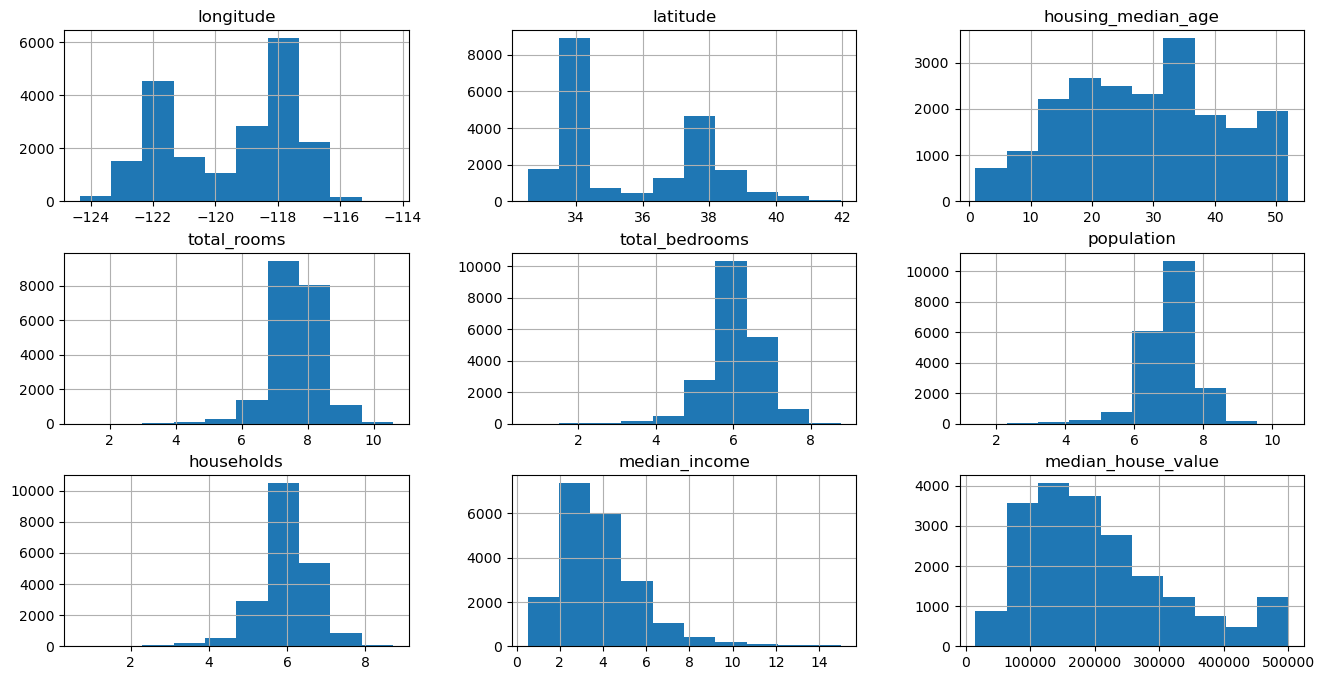

In [7]:
## now, in order to take care of the skewed features
## we try getting their log and see if there's an improvement
data = (data
 .assign(total_rooms = np.log(data.total_rooms + 1),
        total_bedrooms = np.log(data.total_bedrooms + 1),
        population = np.log(data.population + 1),
        households = np.log(data.households + 1))
)
## and checking the histogram again shows significant improvement
data.hist(figsize = (16, 8))

In [8]:
## next, we want to mutate the ocean proximity column
## into something that can be feed into the model
## first we check to see the available categories
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
## for the change, we will be using binary for each category
## and join the new set with our training set
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


<AxesSubplot:>

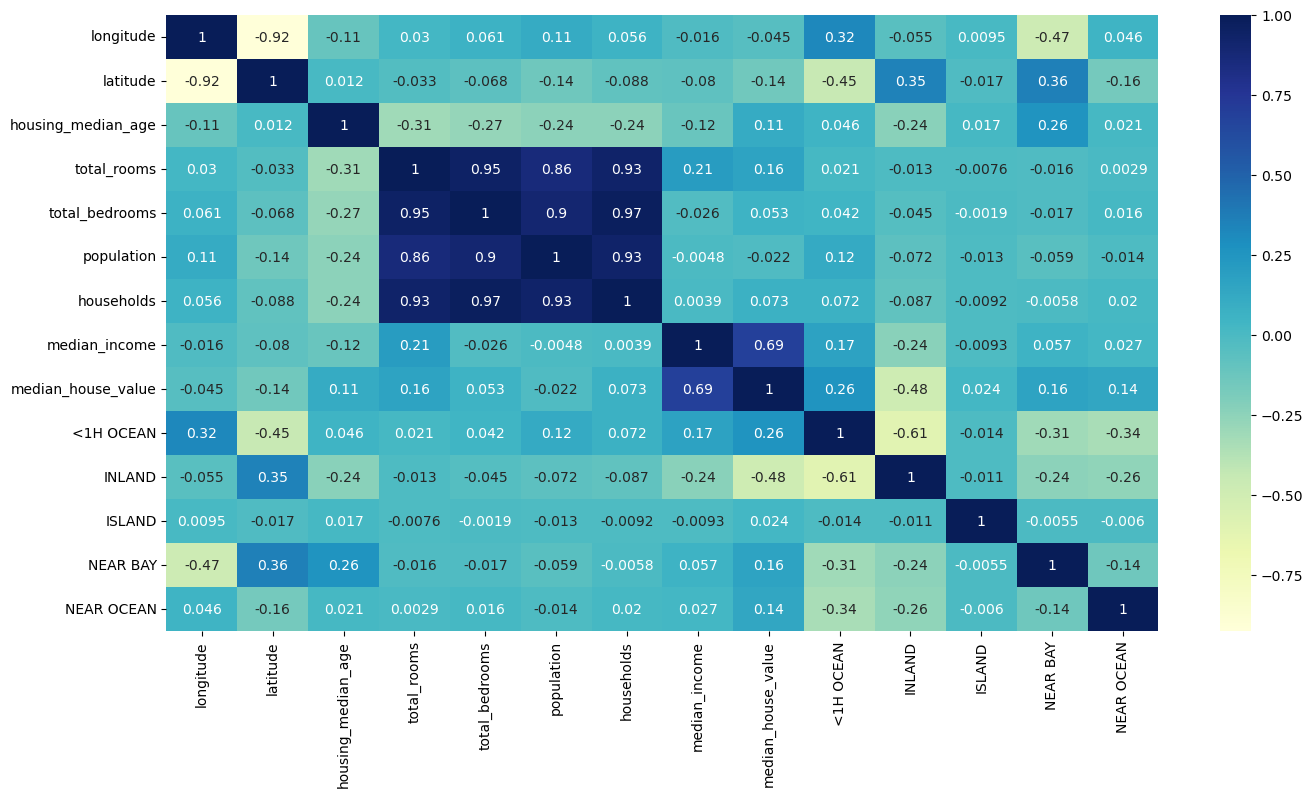

In [10]:
## and now we can check the correlation with our new values
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

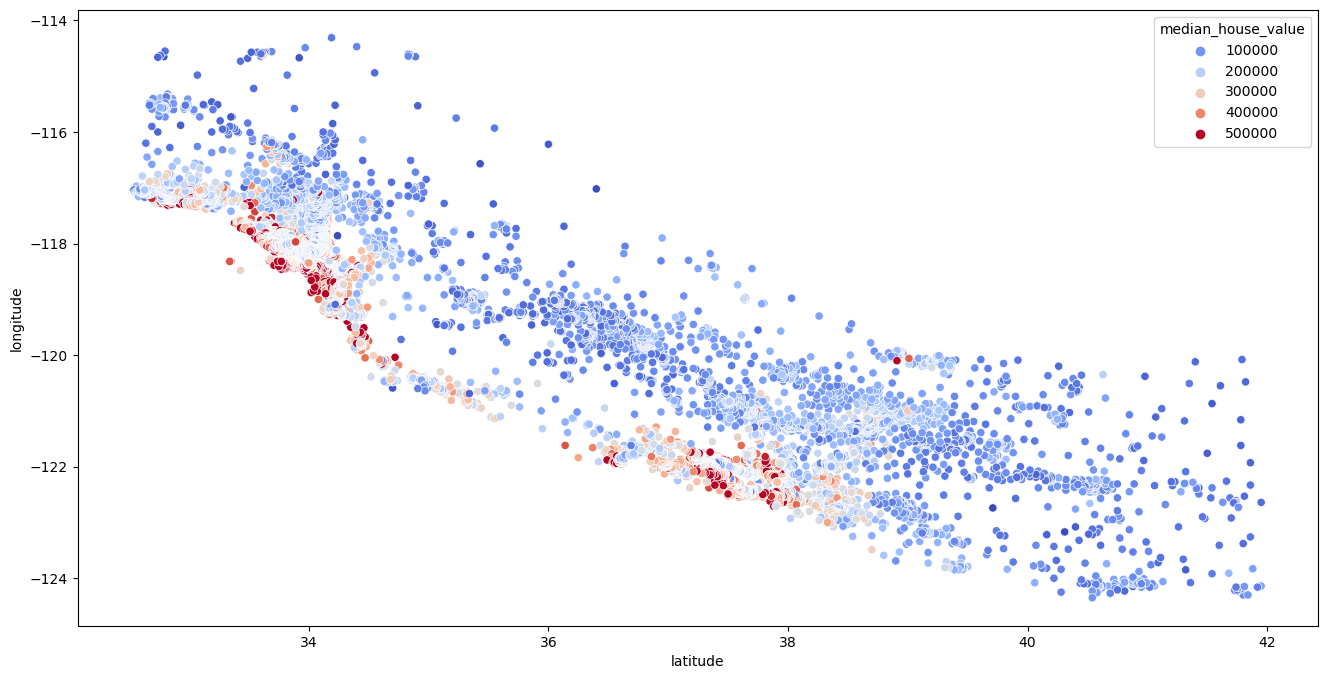

In [11]:
## another interesting visualization would be
## to use the coordinate and see the correlation with price
## which shows that houses closer to the water
## to be more expensive that the ones inland
plt.figure(figsize = (16, 8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = data, hue = 'median_house_value', palette = 'coolwarm')

<AxesSubplot:>

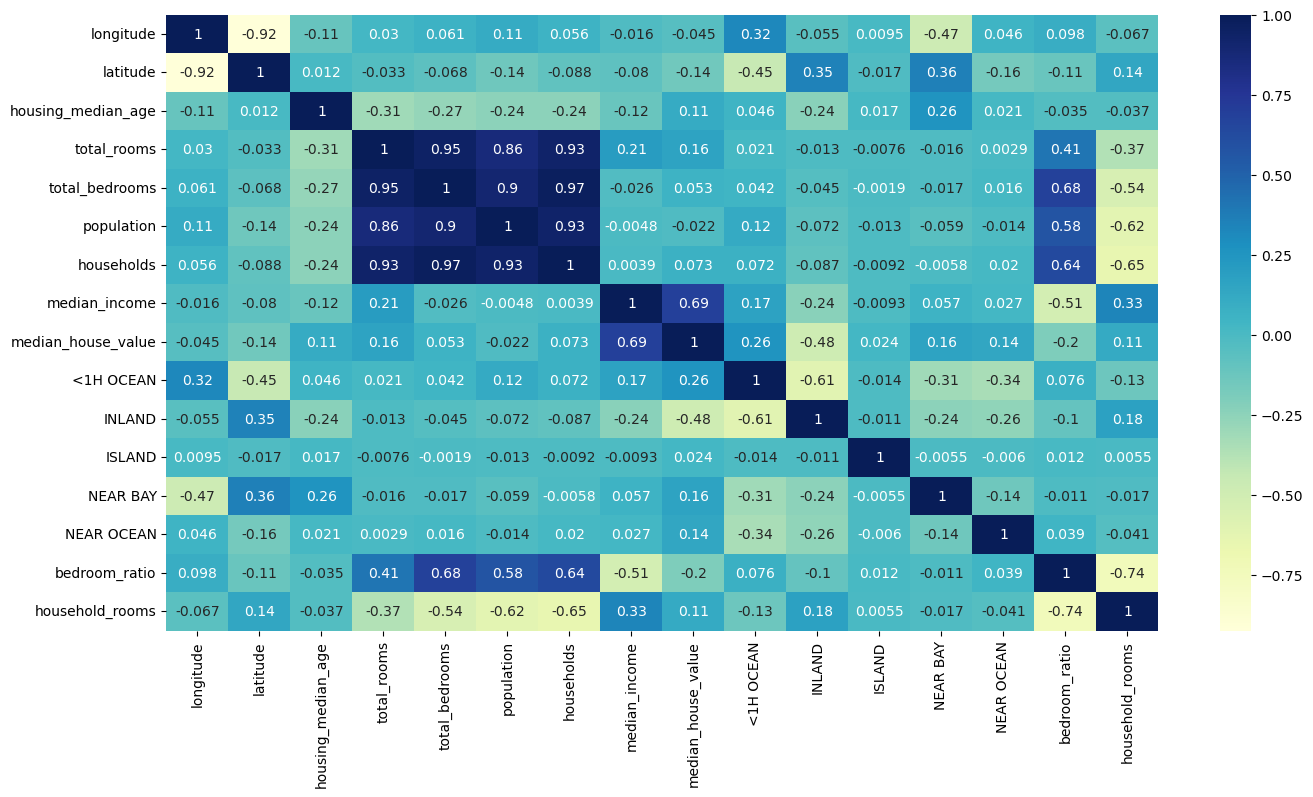

In [12]:
## we can combine a few of the columns
## and create more interesting features to be used in our model
data = (data
 .assign(bedroom_ratio = data.total_bedrooms/data.total_rooms,
        household_rooms = data.total_rooms / data.households)
)

plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

### Linear Regression Model

The first model that we will use for our prediction, is the linear regression.

In [13]:
## first we want to split the data into
## training and test sets
## and first we have to define our X and Y values
X = data.drop(['median_house_value'], axis = 1)
Y = data.median_house_value


## and then create the training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
## and then scale the input train and test
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15874,-122.40,37.75,52.0,7.075809,5.730100,6.937314,5.726848,2.0577,0,0,0,1,0,0.809816,1.235550
3982,-118.63,34.19,32.0,8.180041,6.383507,7.462789,6.335054,5.1529,1,0,0,0,0,0.780376,1.291235
4074,-118.43,34.14,44.0,7.434848,5.480639,6.212606,5.379897,10.9237,1,0,0,0,0,0.737155,1.381968
19376,-120.79,37.76,14.0,8.169620,6.232448,7.317212,6.210600,5.5228,0,1,0,0,0,0.762881,1.315432
17647,-121.91,37.26,32.0,8.290042,6.776507,7.595890,6.678342,3.5625,1,0,0,0,0,0.817427,1.241332


In [14]:
## and then start with our linear regression
## fit it into our training set
reg = LinearRegression()
reg.fit(X_train_s, Y_train)
## and then check the score for test
reg.score(X_test_s, Y_test)

0.6642928305020817

### Random Forest Regressor Model

The second model we will be using is the Random Forest, which we hope to be more accurate than the linear regression model.

In [16]:
forest = RandomForestRegressor()
## and fit our model using the train set
forest.fit(X_train_s, Y_train)
## and then check the score for the test set
forest.score(X_test_s, Y_test)

0.7388938567079515

In [21]:
## our first try was certainly better than LR
## but we want to see if it can be furthur improved
## by using grid search by cross validation
## first we need to create a parameter grid
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[10, 30, 50],
    "max_features":[6, 8, 10],
    "min_samples_split":[2, 4, 6, 8]
}
## and then create our grid search for 5 fold validation
## with a fresh model that hasn't been fitted yet
grid_search = GridSearchCV(forest, param_grid, cv = 5, 
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
## and then fit it into our train set
grid_search.fit(X_train_s, Y_train)
## and then checking the best estimator
best_forest_estimator = grid_search.best_estimator_
## if the best estimate is the max or min in the parameter grid
## it might be worth it to re-test with input values
## explore more in that direction
## we can also test with other parameteres
## if the best_estimator doesn't mention one of the params
## then it picked the default, given that it was one of the options

In [22]:
## and then checking the score for the test set
best_forest_estimator.score(X_test_s, Y_test)
## which has increased slightly, compared the original model

0.7556341959172884

### Summary

In this projcet, we tried two models and none of them gave us the accuracy that we were looking for, so the next steps could be to:
- Try fine tuning these two types of models furthur
- Trying other models, such as decision trees or even neural networks